In [1]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [4]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for year in range(2013, 2018):
#         transactions.loc[transactions["date"].dt.year == year].to_excel(
#             writer, sheet_name=str(year)
#         )
        
# CSV  

for year in range(2013, 2018):
    transactions.loc[transactions["date"].dt.year == year].to_csv(
        f"transactions_{year}.csv"
    )

In [10]:
tx_2014 = pd.read_csv('transactions_2014.csv')
tx_2014.head()

,Unnamed: 0,date,store_nbr,transactions
0,16908,2014-01-01,25,840
1,16909,2014-01-01,36,487
2,16910,2014-01-02,1,1875
3,16911,2014-01-02,2,2122
4,16912,2014-01-02,3,3350


In [11]:
tx_2015 = pd.read_csv('transactions_2015.csv')
tx_2015.head()

,Unnamed: 0,date,store_nbr,transactions
0,34046,2015-01-01,25,2202
1,34047,2015-01-02,1,1021
2,34048,2015-01-02,2,1859
3,34049,2015-01-02,3,3429
4,34050,2015-01-02,4,1521


In [13]:
tx_2014_2015 = pd.concat([tx_2014, tx_2015])

In [14]:
del tx_2014_2015

# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [2]:
stores = pd.read_csv("../retail/stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [3]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [4]:
merged = pd.merge(retail, stores, on=['store_nbr'], how="inner")
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
 6   city         1054944 non-null  object        
 7   state        1054944 non-null  object        
 8   type         1054944 non-null  object        
 9   cluster      1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 80.5+ MB


<Axes: xlabel='city'>

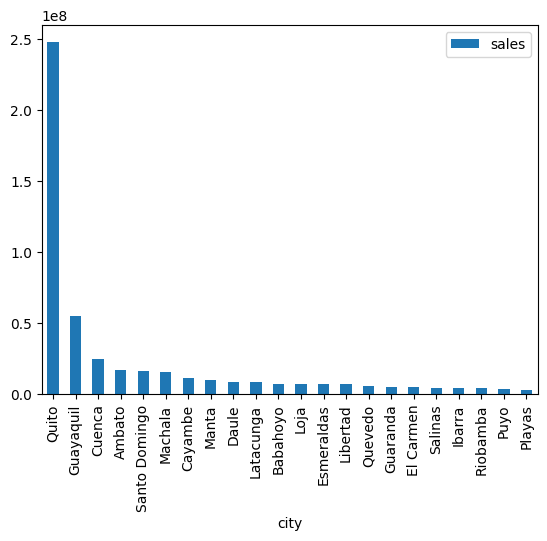

In [7]:
(merged
.groupby('city')
.sum('sales')
.sort_values(by='sales', ascending=False)
.reset_index()[['city', 'sales']]
.plot.bar(x='city', y='sales'))

<Axes: xlabel='date'>

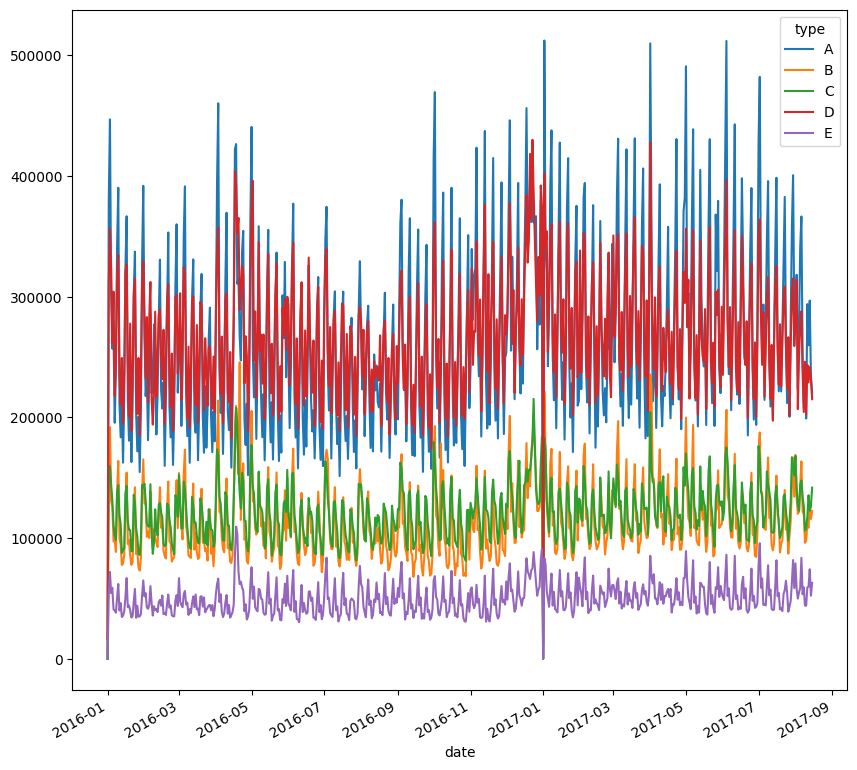

In [12]:
# (merged
# .groupby('type')
# .sum('sales')
# .reset_index()[['type', 'sales']]
# .plot.bar(x='type', y='sales'))

(merged
.pivot_table(
    index=['date'], 
    columns='type', 
    values='sales', 
    aggfunc='sum')
.plot(figsize=(10,10)))

<Axes: xlabel='Month', ylabel='Sales'>

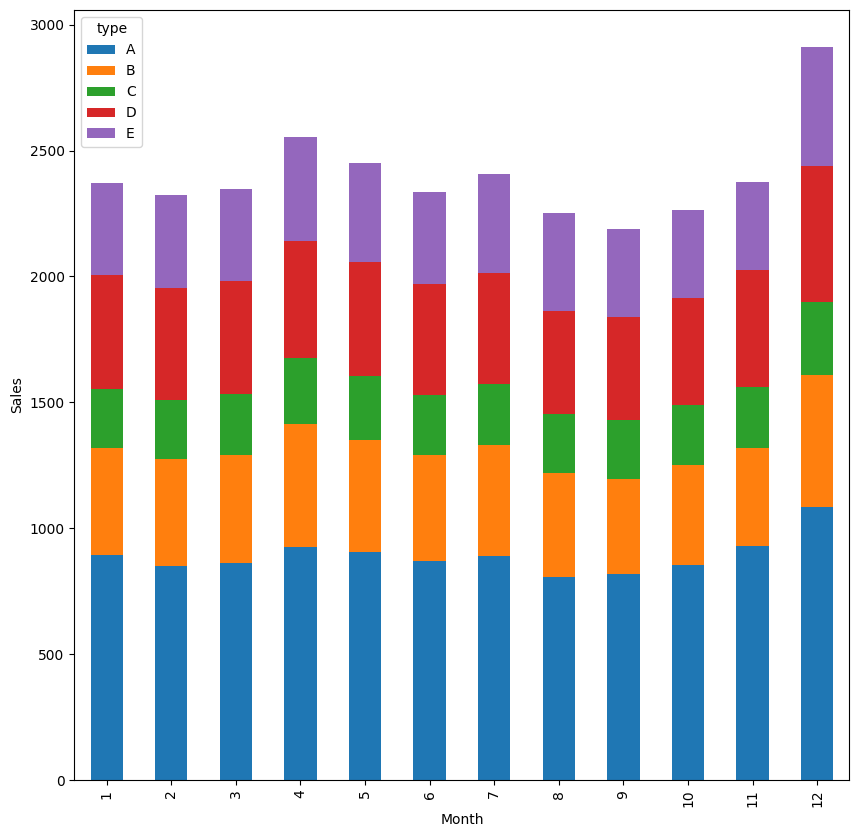

In [17]:
# A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 
(merged
.pivot_table(
    index=['type'], 
    columns=merged.date.dt.month, 
    values='sales', 
    aggfunc='mean')
.T.plot.bar(stacked=True, figsize=(10,10), xlabel='Month', ylabel='Sales'))